# Домашнее задание по статистическому анализу на python

### Пометка
Для более лучшего восприятия, изначальные задания я сделал в виде заголовков. Теперь они выделены жирным и их проще увидеть среди остального текста работы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df = pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

#### Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


#### Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

Для того, чтобы проводить исследования нашего датафрейма, сперва хочу обработать данные на момент выбросов.

Для этого я изучу информацию о нашем датафрейме:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Для моего первого задания мне необходимо обратить внимание на два столбца - Freedom и Positive affect.

Оба этих столбца имеют как минмиум 1 битую запись

In [5]:
df = df[df['Freedom'].notna() & df['Positive affect'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           155 non-null object
Ladder                     155 non-null int64
SD of Ladder               155 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      151 non-null float64
Healthy life
expectancy    149 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 14.5+ KB


Как видно, после чистки данных по двум колонкам, мы потеряли лишь 1 строчку записи.

Теперь можно приступить к частотному анализу.

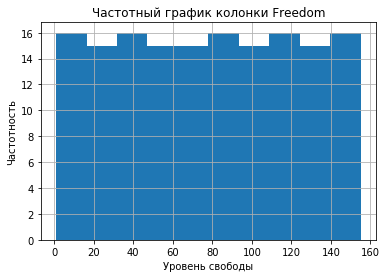

In [6]:
plt.hist(df['Freedom'])
plt.grid(True)

plt.title('Частотный график колонки Freedom')
plt.xlabel('Уровень свободы')
plt.ylabel('Частотность')

plt.show()

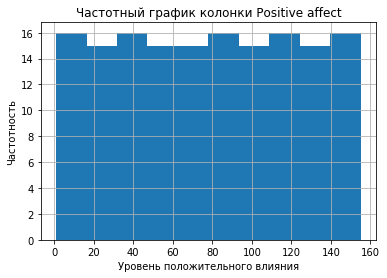

In [7]:
plt.hist(df['Positive affect'])
plt.grid(True)

plt.title('Частотный график колонки Positive affect')
plt.xlabel('Уровень положительного влияния')
plt.ylabel('Частотность')

plt.show()

Как видно из графиков, на обоих из них, распределение - равномерное.

При этом, графики для двух разных показателей выглядят практически одинаково.

#### Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

Для бОльшей практики, каждую из метрик я решил получить при помощи найденного готового решения и алгоритмического решения.

Готовые решения я нумерую 1, а алгоритмические - 2:

In [8]:
working_series = df['Freedom']

In [9]:
# median

def get_median(data_list):
    sorted_data = sorted(data_list)
    middle_index = len(sorted_data) // 2
    
    if len(data_list) % 2 == 0:
        return (sorted_data[middle_index - 1] + sorted_data[middle_index]) / 2
    else:
        return sorted_data[middle_index]

median1 = np.median(working_series)
median2 = get_median(working_series)

print('median1', median1)
print('median2', median2)

median1 78.0
median2 78.0


In [10]:
# mode

def get_mode(data_list):
    result = {}
    
    for key in data_list:
        result.setdefault(key, 0)
        result[key] += 1
        
    return {
        'result': result,
        'mode': max(result, key=lambda key: result[key]),
    }

mode1 = sts.mode(working_series).mode
mode2 = get_mode(working_series)['mode']

print('mode1', mode1)
print('mode2', mode2)

mode1 [1.]
mode2 5.0


Интересный результат, попытаемся его объяснить.

Для этого я получу подсчитанный словарь и посмотрю, в чём там дело:

In [11]:
mode_dict = get_mode(working_series)['result']

mode_df = pd.DataFrame.from_dict(mode_dict, orient='index').reset_index()

print(
f"""
df min:
{mode_df.min()}

df max:
{mode_df.max()}
"""
)


df min:
index    1.0
0        1.0
dtype: float64

df max:
index    155.0
0          1.0
dtype: float64



Очевидно, каждое значение в колонке df['Freedom'] уникально и встречается 1 раз.

Эту гипотезу легко проверить

In [12]:
if len(working_series) == len(working_series.unique()):
    print('Гипотеза верна')
else:
    print('Гипотеза не верна')

Гипотеза верна


In [13]:
# mean

mean1 = working_series.mean()
mean2 = sum(working_series) / len(working_series)

print('mean1', mean1)
print('mean2', mean2)

mean1 78.0
mean2 78.0


In [14]:
# standart deviation
import math

def get_standart_deviation(data_list):
    # calculation is native for supporting lot of iterable data structures
    mean = sum(data_list) / len(data_list)
    return math.sqrt(
        sum((np.array(data_list) - mean)**2) / len(data_list)
    )

deviation1 = np.std(working_series)
deviation2 = get_standart_deviation(working_series)

print('deviation1', deviation1)
print('deviation2', deviation2)

deviation1 44.74371464239419
deviation2 44.74371464239419


In [15]:
# variance of normal distribution

def get_var_of_norm_dist(data_list):
    return get_standart_deviation(data_list)**2

dispersion1 = np.var(working_series)
dispersion2 = get_var_of_norm_dist(working_series)

print('dispersion1', dispersion1)
print('dispersion2', dispersion2)

dispersion1 2002.0
dispersion2 2002.0


In [16]:
# min max

working_min = min(working_series)
working_max = max(working_series)
working_scope = working_max - working_min

print('working_min', working_min)
print('working_max', working_max)
print('working_scope', working_scope)

working_min 1.0
working_max 155.0
working_scope 154.0


Выборсы мы отбросили в начале нашего исследования

#### Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

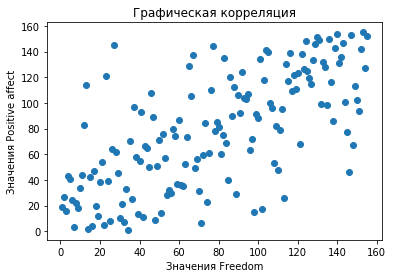

In [17]:
x = df['Freedom']
y = df['Positive affect']

plt.scatter(x, y)
plt.title('Графическая корреляция')
plt.xlabel('Значения Freedom')
plt.ylabel('Значения Positive affect')

plt.show()

In [18]:
corr, _ = sts.pearsonr(x, y)
print(f'Коэффициент корреляции Пирсона {corr}')

Коэффициент корреляции Пирсона 0.6817698430601656


Как можно заметить выше, коэффициент корреляции Пирсона выше нуля, это означает, что корреляция - **возрастающая**

#### Нормализовать данные колонки Freedom (централизация + масштабирование)

In [19]:
from sklearn import preprocessing

working_series = df['Freedom']
normalize_series = working_series - working_series.mean()

print('normalize_mean', normalize_series.mean())

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaled_series = min_max_scaler.fit_transform(np.array(normalize_series).reshape(-1, 1))

print('scaled_series min', scaled_series.min())
print('scaled_series max', scaled_series.max())

normalize_mean 0.0
scaled_series min -1.0
scaled_series max 1.0


#### Построить матрицу корреляций для всех колонок таблицы

В начале упражнения я очистил от выбросов только две колонки, над которыми проводил исследования. Сейчас же моё исследование будет затрагивать сразу все колонки датафрейма. Поэтому, я считаю, что прежде необходимо избавиться от всех не валидных значений

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           155 non-null object
Ladder                     155 non-null int64
SD of Ladder               155 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      151 non-null float64
Healthy life
expectancy    149 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 14.5+ KB


Как мы видим, в нашем датафрейме осталось 155 записей и некоторые колонки расходятся по длине с другими колонками по признаку "non-null". Избавимся от лишних данных:

In [21]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           140 non-null object
Ladder                     140 non-null int64
SD of Ladder               140 non-null int64
Positive affect            140 non-null float64
Negative affect            140 non-null float64
Social support             140 non-null float64
Freedom                    140 non-null float64
Corruption                 140 non-null float64
Generosity                 140 non-null float64
Log of GDP
per capita      140 non-null float64
Healthy life
expectancy    140 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.1+ KB


Теперь в нашей таблице осталось лишь 140 записей, но все данные теперь валидны. Можно построить матрицу корреляций из всех колонок

#### UPD: 
подготовка на предыдущем этапе не требовалась, т.к. я буду пользоваться методом `pandas.DataFrame.corr()`, а он, как заявленно в документации, сам отметает все NA/null значения...

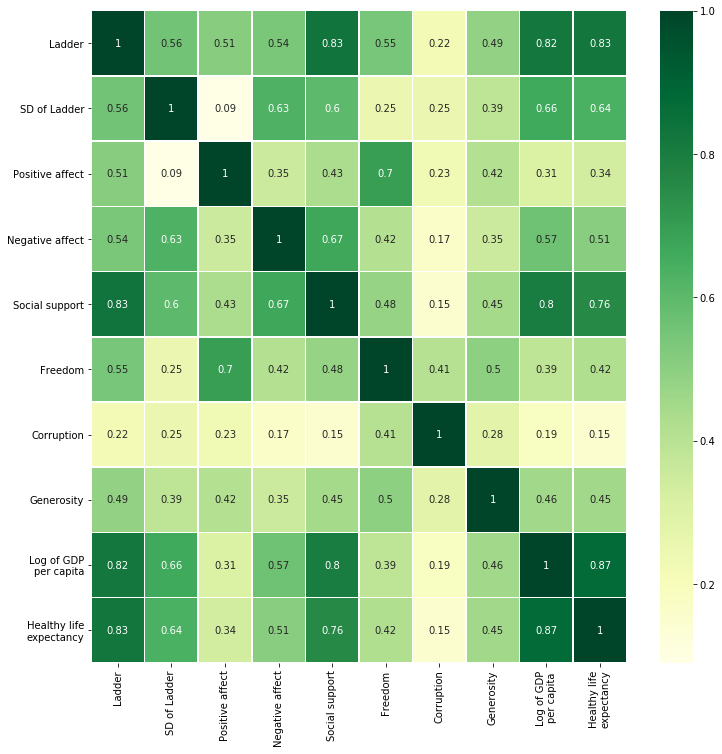

In [28]:
import seaborn as sns

plt.subplots(figsize=(12, 12))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='YlGn',
    linewidths=.5
)

plt.show()

#### Загрузить следующую таблицу: 

In [29]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Перед началом исследования оценим качество данных

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Судя по информации о датафрейме, битых данных нет

#### Сделать частотный график колонки AveragePrice. Какое это распределение?

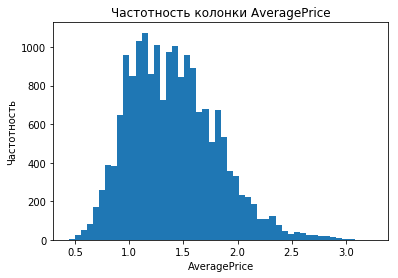

In [44]:
plt.hist(df['AveragePrice'], bins=50)

plt.title('Частотность колонки AveragePrice')
plt.xlabel('AveragePrice')
plt.ylabel('Частотность')

plt.show()

Частотный анализ графика колонки AveragePrice показал, что она имеет нормальное распределение

#### Найти корреляцию в следующих колонках:

#### Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

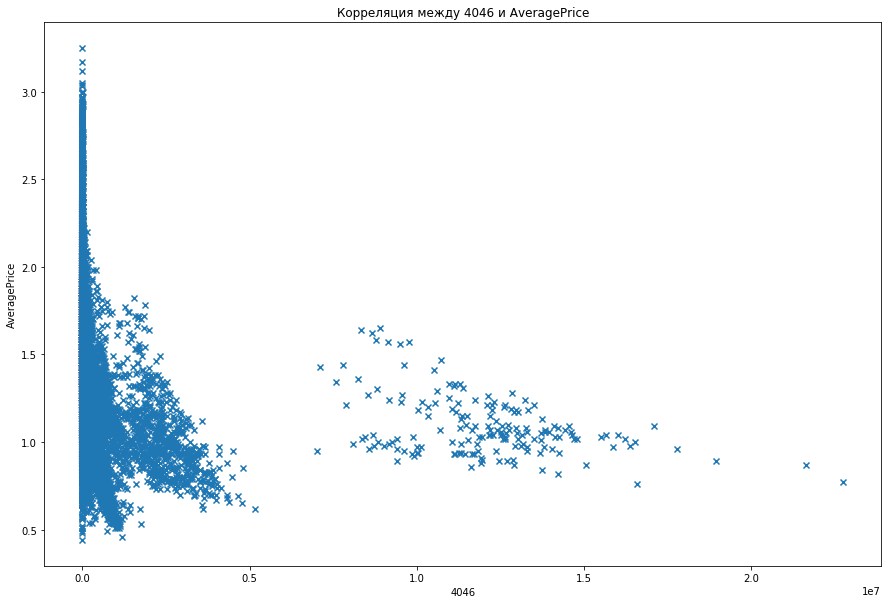

In [58]:
x_col_name = '4046'
y_col_name = 'AveragePrice'

x = df[x_col_name]
y = df[y_col_name]

plt.figure(figsize=(15, 10))
plt.scatter(x, y, marker='x')

plt.title(f'Корреляция между {x_col_name} и {y_col_name}')
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)

plt.show()

Судя по графику, я определил на нём присутствие отрицательной корреляции.

Это просматривается на участках $$0.02^7- 0.5^7 \\ и \\ 0.8^7 - 1.7^7$$ по шкале 4046

Проверим наше утверждение при помощи Коэффициента Пирсона:

In [69]:
corr = df[x_col_name].corr(df[y_col_name])

print('Коэффициент Пирсона равен =', corr)

Коэффициент Пирсона равен = -0.2083170484878849


Ответ подтверждает моё заключение, корреляция отрицательная!